<a href="https://colab.research.google.com/github/Makssadilov2702/Scikit-learn/blob/main/%D0%94%D0%97_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn;
sklearn.show_versions()
sklearn.__version__


System:
    python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\maksi\anaconda3\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 25.0
   setuptools: 75.8.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\Users\maksi\anaconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\maksi\anaconda3\vcomp140.dll
        version: None


'1.5.1'

In [ ]:
#импорт датасета по жилью
from sklearn.datasets import fetch_california_housing
clf = fetch_california_housing()
X=clf.data
y=clf.target
feature_names = clf.feature_names
print(X.shape)
print(y.shape)
print(feature_names)

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
#разделение набора данных на обучающие и тествые (70 к 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
y_test

array([1.369, 2.413, 2.007, ..., 3.519, 0.925, 2.983])

In [ ]:
# инициируем линейную модель и подгоним ее под данные
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("R-2 значение: {0:0.4f} \n".format(lm.score(X_train, y_train)))

R-2 значение: 0.6113 



In [ ]:
param_df = pd.DataFrame({"Признаки": ['intercept'] + list(feature_names),
"Коэффициенты": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

   Коэффициенты    Признаки
0    -36.012229   intercept
1      0.446774      MedInc
2      0.009184    HouseAge
3     -0.118117    AveRooms
4      0.642291   AveBedrms
5     -0.000009  Population
6     -0.004085    AveOccup
7     -0.409023    Latitude
8     -0.423420   Longitude


In [ ]:
#%% проверка производительности на тестовых данных
predicted = lm.predict(X_test)
predicted

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

r_squared = lm.score(X_test, y_test)
mae_value = mean_absolute_error(y_test, lm.predict(X_test))
rmse_value = np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))
rae_value = np.sum(np.abs(y_test - lm.predict(X_test))) / np.sum(np.abs(y_test - np.mean(y_test)))
rse_value = np.sum((y_test - lm.predict(X_test))**2) / np.sum((y_test - np.mean(y_test))**2)
print(f"Значение R-квадрат равно: {r_squared:.4f}")
print(f"Средняя абсолютная ошибка: {mae_value:.6f}")
print(f"Корневая средняя квадратичная ошибка: {rmse_value:.6f}")
print(f"Относительная абсолютная ошибка: {rae_value:.6f}")
print(f"Относительная квадратичная ошибка: {rse_value:.6f}")

Значение R-квадрат равно: 0.5926
Средняя абсолютная ошибка: 0.536182
Корневая средняя квадратичная ошибка: 0.736986
Относительная абсолютная ошибка: 0.585882
Относительная квадратичная ошибка: 0.407391


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #для K-кратной перекрестной проверки
#from sklearn.ensemble import RandomForestClassifier #случайный лес

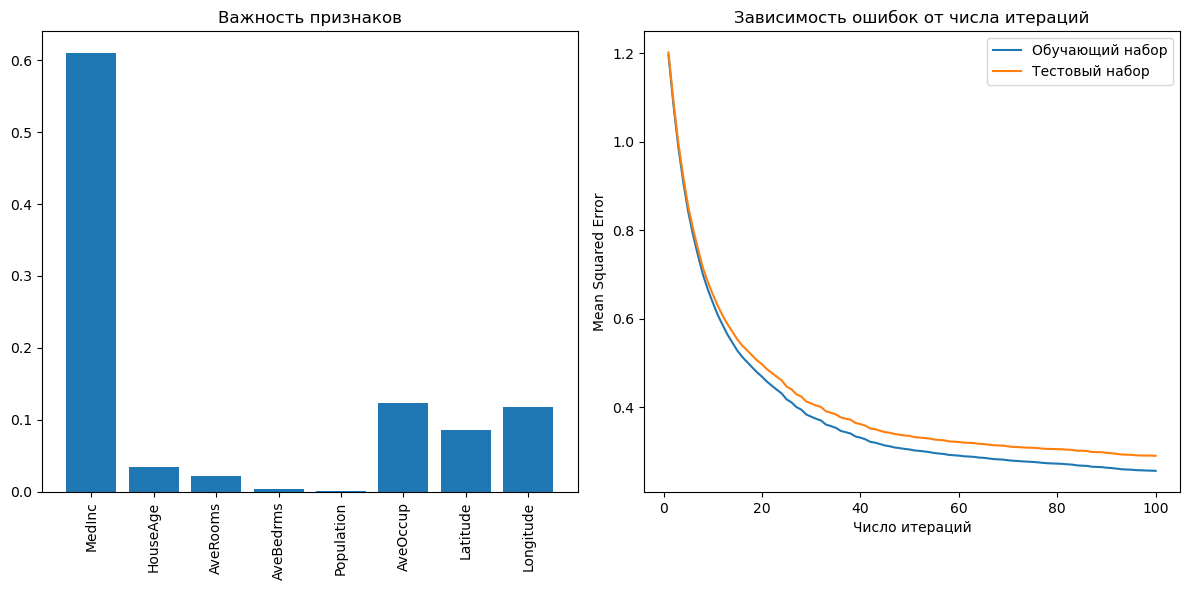

In [ ]:
# в едином фрагменте рассмотрим этапы разделение-> обучение-> выбор важных признаков -> предсказание на новых данных
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Создание и обучение градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)

# Важность признаков
feature_importance = gb_model.feature_importances_

# Величина ошибок на обучающем и тестовом наборах
train_errors = []
test_errors = []

for n_estimators in range(1, 101):
    gb_model.set_params(n_estimators=n_estimators)
    gb_model.fit(X_train, y_train)

    # Предсказание на обучающем и тестовом наборах
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)

    # Расчет ошибок
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Построение графиков
plt.figure(figsize=(12, 6))

# График важности признаков
plt.subplot(1, 2, 1)
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.title('Важность признаков')

# График зависимости величины ошибок от числа итераций
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), train_errors, label='Обучающий набор')
plt.plot(range(1, 101), test_errors, label='Тестовый набор')
plt.xlabel('Число итераций')
plt.ylabel('Mean Squared Error')
plt.title('Зависимость ошибок от числа итераций')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# инициировать линейную модель
lm = LinearRegression()

In [ ]:
# масштабировать характеристики
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmadf = pd.DataFrame(scaled_minmax, columns = feature_names)

In [ ]:
#рекурсивное исключение признаков с перекрестной валидацией, используя r-квадрат в качестве метрики
rfecv = RFECV(estimator=lm, step=1, cv=5)
rfecv.fit(scaled_minmadf, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
# выведем оптимальное количество функций
print("Оптимальное количество признаков : %d" % rfecv.n_features_)

Оптимальное количество признаков : 8


In [ ]:
# %% fit model с выбранными функциями
#%% fit model с выбранными функциями  X_train_new = X_train[:,rfecv.support_]
X_train_new = X_train[:,rfecv.support_]
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
predicted = lm2.predict(X_train_new)

rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Среднеквадратическое отклонение ошибки: {0:0.4f}" .format(rmse))

Среднеквадратическое отклонение ошибки: 0.7192


In [ ]:
# выведем R-квадрат
print("R-квадрат занчение: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

R-квадрат занчение: 0.6113 



In [ ]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_])
# выведем перехват и коэффициенты
param_df = pd.DataFrame({"Характеристики": ['intercept'] + feature_cols_selected ,
"Коэффициент": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

   Коэффициент Характеристики
0   -36.012229      intercept
1     0.446774         MedInc
2     0.009184       HouseAge
3    -0.118117       AveRooms
4     0.642291      AveBedrms
5    -0.000009     Population
6    -0.004085       AveOccup
7    -0.409023       Latitude
8    -0.423420      Longitude


In [ ]:
# %% проверить производительность по тестовым данным
X_test_part = X_test[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = lm2.predict(X_train_new)

r_squared = lm2.score(X_train_new, y_train)
mae_value = mean_absolute_error(y_train, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_train, y_pred))
rae_value = np.sum(np.abs(y_train - y_pred)) / np.sum(np.abs(y_train - np.mean(y_train)))
rse_value = np.sum((y_train - y_pred)**2) / np.sum((y_train - np.mean(y_train))**2)

print(f"Значение R-квадрат равно: {r_squared:.4f}")
print(f"Средняя абсолютная ошибка: {mae_value:.6f}")
print(f"Корневая средняя квадратичная ошибка: {rmse_value:.6f}")
print(f"Относительная абсолютная ошибка: {rae_value:.6f}")
print(f"Относительная квадратичная ошибка: {rse_value:.6f}")

Значение R-квадрат равно: 0.6113
Средняя абсолютная ошибка: 0.529347
Корневая средняя квадратичная ошибка: 0.719236
Относительная абсолютная ошибка: 0.581559
Относительная квадратичная ошибка: 0.388706


In [ ]:
#from sklearn import linear_model
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=.5)

In [ ]:
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

Значение R-квадрат равно: 0.6113 



In [ ]:
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [Ridge.intercept_] + list(Ridge.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

   Коэффициенты Характеристики
0    -36.010394      intercept
1      0.446702         MedInc
2      0.009185       HouseAge
3     -0.117980       AveRooms
4      0.641594      AveBedrms
5     -0.000009     Population
6     -0.004086       AveOccup
7     -0.409018       Latitude
8     -0.423405      Longitude


In [ ]:
predicted_Ridge = Ridge.predict(X_test)

In [ ]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(Ridge.score(X_test, y_test)))

print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.5926
Средняя абсолютная ошибка: 0.536186
Корневая средняя квадратичная ошибка: 0.736986
Относительная абсолютная ошибка: 0.585886
Относительная квадратичная ошибка: 0.407391


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np

RidgeCV = RidgeCV(alphas=np.logspace(0, 1), cv=10)

In [ ]:
RidgeCV.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(RidgeCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [RidgeCV.intercept_] + list(RidgeCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.6113 

   Коэффициенты Характеристики
0    -35.974382      intercept
1      0.445363         MedInc
2      0.009208       HouseAge
3     -0.115432       AveRooms
4      0.628630      AveBedrms
5     -0.000009     Population
6     -0.004095       AveOccup
7     -0.408898       Latitude
8     -0.423108      Longitude


In [ ]:
predicted_RidgeCV = RidgeCV.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_RidgeCV-y_test)**2))
rae = np.mean(abs(predicted_RidgeCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_RidgeCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(RidgeCV.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.5926
Средняя абсолютная ошибка: 0.536258
Корневая средняя квадратичная ошибка: 0.736983
Относительная абсолютная ошибка: 0.585966
Относительная квадратичная ошибка: 0.407388


In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [Lasso.intercept_] + list(Lasso.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.5506 

   Коэффициенты Характеристики
0     -7.537997      intercept
1      0.395233         MedInc
2      0.015027       HouseAge
3     -0.000000       AveRooms
4      0.000000      AveBedrms
5      0.000014     Population
6     -0.003588       AveOccup
7     -0.111083       Latitude
8     -0.096984      Longitude


In [ ]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(Lasso.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.5323
Средняя абсолютная ошибка: 0.536258
Корневая средняя квадратичная ошибка: 0.789658
Относительная абсолютная ошибка: 0.637761
Относительная квадратичная ошибка: 0.467703


In [ ]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=10, random_state=0)
ElasticNetCV.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.5906 

   Коэффициенты Характеристики
0    -24.217710      intercept
1      0.387665         MedInc
2      0.011949       HouseAge
3     -0.000000       AveRooms
4      0.000000      AveBedrms
5      0.000002     Population
6     -0.004201       AveOccup
7     -0.293206       Latitude
8     -0.291907      Longitude


In [ ]:
import numpy as np
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_ElasticNetCV-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.5721
Средняя абсолютная ошибка: 0.552513
Корневая средняя квадратичная ошибка: 0.755299
Относительная абсолютная ошибка: 0.603727
Относительная квадратичная ошибка: 0.427888


SGD Стохастический градиентный спуск

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(SGD.score(X_train, y_train)))

Значение R-квадрат равно: -340.3441


In [ ]:
predicted_SGD = SGD.predict(X_test)
mae = np.mean(abs(predicted_SGD-y_test))
rmse = np.sqrt(np.mean((predicted_SGD-y_test)**2))
rae = np.mean(abs(predicted_SGD-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(SGD.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: -1802.2380
Средняя абсолютная ошибка: 2.670352
Корневая средняя квадратичная ошибка: 49.032063
Относительная абсолютная ошибка: 2.917874
Относительная квадратичная ошибка: 1803.237975


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.1, loss='squared_error',max_depth=3,
                         max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,  n_iter_no_change=None, random_state=None,
                         subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

#min_impurity_split=None, presort='auto'

GradientBoostingRegressor()

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm.predict(X_train))))

Значение R-квадрат равно: 0.8078


In [ ]:
params={'n_estimators':1000, 'max_depth':3,'min_samples_split':4,'learning_rate':0.01, 'loss':'squared_error','random_state':0}
gbm_1=GradientBoostingRegressor(**params)
gbm_1

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.01, loss='squared_error',max_depth=3,
                         max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=4,
                         min_weight_fraction_leaf=0.0, n_estimators=1000,  n_iter_no_change=None, random_state=0,
                         subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
gbm_1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm_1.predict(X_train))))

Значение R-квадрат равно: 0.8057


In [ ]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV
start=datetime.now()
tuned_params_qbm={'n_estimators': [500, 10000], 'max_depth':[2,4],'min_samples_leaf':[2,4], 'min_samples_split':[2,6],'learning_rate': [0.001,0.01]}
gbm_scv=GridSearchCV(gbm, tuned_params_qbm, cv=5)
gbm_scv.fit(X_train, y_train)
print("Cетка кросс-валидации длилась : {0:0.2f} сек".format(datetime.now()-start))
print("Наилучший набор параметров, найденный в наборе для разработки")
print(gbm_scv.best_params_)

In [ ]:
#подходящая модель с наилучшим набором значений
params_2={'n_estimators': 10000, 'max_depth': 2,'min_samples_leaf': 2, 'min_samples_split': 6,'learning_rate': 0.01, 'loss':'squared_error'}
gbm_2=GradientBoostingRegressor(**params_2)
gbm_2.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm_2.predict(X_train))))

Значение R-квадрат равно: 0.8516


In [ ]:
import numpy as np
predicted_gbm = gbm_1.predict(X_test)
mae = np.mean(abs(predicted_gbm-y_test))
rmse = np.sqrt(np.mean((predicted_gbm-y_test)**2))
rae = np.mean(abs(predicted_gbm-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_gbm-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_test,predicted_gbm)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.7797
Средняя абсолютная ошибка: 0.371833
Корневая средняя квадратичная ошибка: 0.541926
Относительная абсолютная ошибка: 0.406299
Относительная квадратичная ошибка: 0.220278


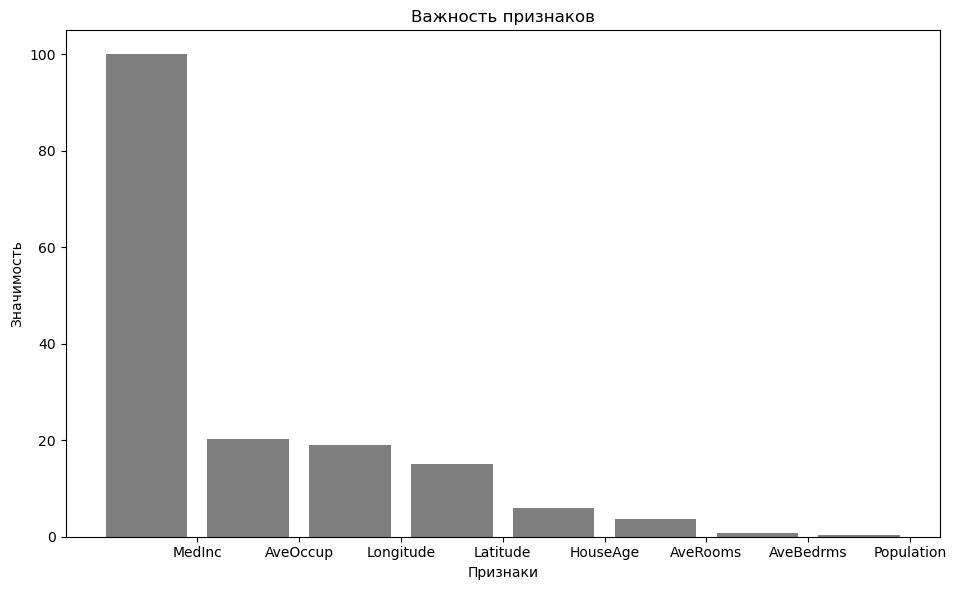

AttributeError: 'GradientBoostingRegressor' object has no attribute 'loss_'

In [ ]:
#построение графиков проверки важности признаков (входов) и зависимости величины ошибок (Loss) от числа итераций на обучающем и тестовом выборках
#import numpy as np
#import matplotlib.pyplot as plt

feature_importance=gbm_1.feature_importances_
feature_importance=100.0 * (feature_importance/ feature_importance.max())
sorted_idx=np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6 * 1.618,6))
index=np.arange(len(feature_names))
bar_width=0.5
plt.bar(index, feature_importance[sorted_idx], color='black', alpha=0.5)
plt.xlabel('Признаки')
plt.ylabel('Значимость')
plt.title('Важность признаков')
plt.xticks(index+ bar_width, np.array(feature_names)[sorted_idx])
plt.tight_layout()
plt.show()

#построение графиков отклонения для обучающего и тестового множеств
test_score=np.zeros(params['n_estimators'])
for j,y_pred in enumerate(gbm_1.staged_predict(X_test)):
    test_score[j]=gbm_1.loss_(y_test, y_pred)

plt.figure(figsize=(6*1.618,6))
plt.title('Отклонение')
plt.plot(np.arange(params['n_estimators'])+1,gbm_1.train_score_,'b-', label='Отклонение обучающего набора ')
plt.plot(np.arange(params['n_estimators'])+1,test_score,'r-', label='Отклонение тестового набора ')
plt.legend(loc='upper right')
plt.xlabel('Увеличение числа итераций')
plt.ylabel('Отклонение')

In [ ]:

from sklearn.linear_model import Lasso
#import pandas as pd
#import numpy as np
df = pd.read_csv('gm_2008_region.csv')
X = df.drop(['life','Region'], axis=1)
y = df['life'].values.reshape(-1,1)
df_columns = df.drop(['life','Region'], axis=1).columns

def L2Normalizer(X) :
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

# Создаём lasso-регрессор: lasso
lasso = Lasso(alpha=0.4)

# Применяем к данным
reg = lasso.fit(L2Normalizer(X), y)

# Вычисляем и выводим коэффициенты
lasso_coef = reg.coef_ / np.linalg.norm(X-np.mean(X, axis=0), axis=0)
print(lasso_coef)

# Выводим коэффициенты
plt.grid(color="#E5E5E5")
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)

plt.show()
